## Association Analysis (İlişkilendirme Analizi)
## Association Rule Mining = Association Analysis

https://livebook.manning.com/book/machine-learning-in-action/chapter-11/

## APRIORI Algotriması
pip install apyori

### İki ürün (veya dizi, film, müzik eseri, video,..) arasındaki ilişkinin ne kadar güçlü olduğunu belirler.
Örnek: Soğan + Patates => Hamburger

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori  # Apriori algoritması import

In [7]:
# Bir markette yapılan alışveriş kayıtlarının tutulduğu dosyayı oku 
# dosya adı: Groceries.csv

alisverisler = []
with open('Groceries.csv') as f:
    for line in f:
        alisveris = [urun for urun in line.strip().split(',') if urun != 'NaN']
        alisverisler.append(alisveris)

In [10]:
alisverisler[:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals']]

In [12]:
len(alisverisler)

9835

In [13]:
kurallar = list(apriori(alisverisler, min_support=0.001, min_confidence=0.10, min_length=2, max_length=2))

In [15]:
print(kurallar[0])

RelationRecord(items=frozenset({'bottled water'}), support=0.11052364006100661, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled water'}), confidence=0.11052364006100661, lift=1.0)])


In [16]:
# List olan kurallar => data frame
kurallar_df = pd.DataFrame([
    {'From':list(kural[0])[0],
    'To':list(kural[0])[1],
    'Support':kural[1],
    'Confidence':kural[2][0][2],
    'Lift':kural[2][0][3]} for kural in kurallar if len(kural[0]) == 2])

In [17]:
kurallar_df.head()

,From,To,Support,Confidence,Lift
0,Instant food products,bottled water,0.001017,0.126582,1.145296
1,Instant food products,butter,0.001220,0.151899,2.741145
2,citrus fruit,Instant food products,0.001118,0.139241,1.682347
3,curd,Instant food products,0.001322,0.164557,3.088583
4,domestic eggs,Instant food products,0.001017,0.126582,1.995091


In [18]:
# Support, Confidence ve Lift tanımları için => https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html

In [19]:
kurallar_df.shape

(1932, 5)

In [20]:
# En çok ilişkili ürünler (ilk 50)
kurallar_df = kurallar_df.sort_values('Support', ascending=False).head(50)

In [21]:
# Ürün listesi
urunler = set(kurallar_df['From']) | set(kurallar_df['To'])

In [23]:
imap = {urun : u for u, urun in enumerate(urunler)}

In [24]:
kurallar_df['FromN'] = kurallar_df['From'].map(imap)
kurallar_df['ToN'] = kurallar_df['To'].map(imap)

In [25]:
# En yüksek ilişkilendirme kuralına sahip 20 ürün (Support)
kurallar_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
1539,other vegetables,whole milk,0.074835,0.386758,1.513634,0,4
1744,rolls/buns,whole milk,0.056634,0.307905,1.205032,3,4
1929,yogurt,whole milk,0.056024,0.219260,1.571735,15,4
1769,root vegetables,whole milk,0.048907,0.448694,1.756031,17,4
1506,other vegetables,root vegetables,0.047382,0.244877,2.246605,0,17
1540,other vegetables,yogurt,0.043416,0.224383,1.608457,0,15
1505,other vegetables,rolls/buns,0.042603,0.220179,1.197047,0,3
1911,whole milk,tropical fruit,0.042298,0.403101,1.577595,4,19
1864,soda,whole milk,0.040061,0.229738,0.899112,8,4
1725,soda,rolls/buns,0.038332,0.208402,1.195124,8,3


In [27]:
# İlişikilendirme kurallarının grafik gösterimi
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

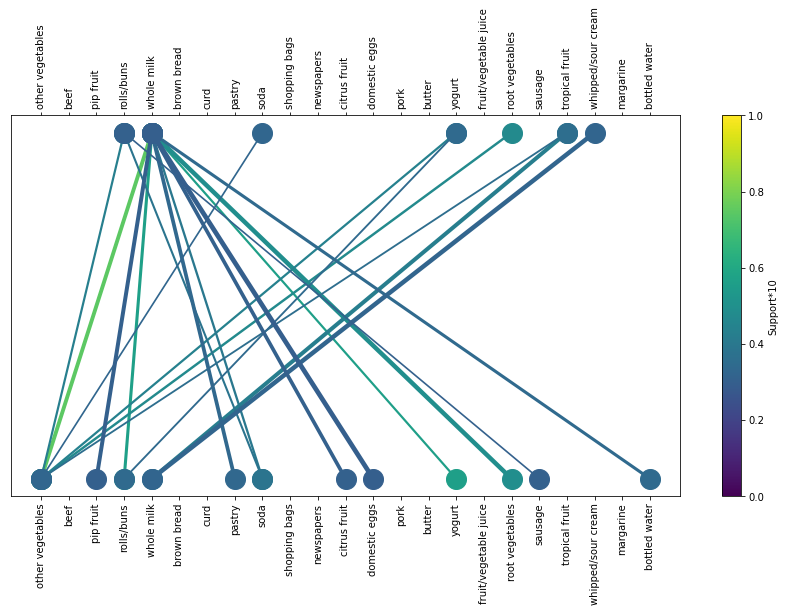

In [38]:
fig = plt.figure(figsize=(15,7))
for index, row in kurallar_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10), markersize=20, lw=row['Confidence']*10)
    
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

plt.xticks(range(len(urunler)), urunler, rotation='vertical')
plt.yticks([])
plt.show()

## ECLAT Algoritması
Apriori algoritması büyük veri setlerinde performans problemi yaşar. ECLAT algoritması performans açısından daha başarılıdır.
### ECLAT algoritması kullanımı
https://www.youtube.com/watch?v=oBiq8cMkTCU

In [1]:
# pip install pyECLAT
from pyECLAT import ECLAT  # Eclat algoritması için

In [4]:
df = pd.read_csv('Groceries.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
eclat = ECLAT(data=df, verbose=True)

_, supports = eclat.fit(min_support=0.03, min_combination=2, max_combination=2, separator=' & ', verbose=True)

100%|██████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 1190.18it/s]
4it [00:00, 36.04it/s]

Combination 2 by 2


946it [00:21, 43.19it/s]


In [6]:
supports

{'sausage & rolls/buns': 0.030604982206405694,
 'citrus fruit & whole milk': 0.030503304524656837,
 'rolls/buns & other vegetables': 0.042602948652770714,
 'rolls/buns & soda': 0.03833248601931876,
 'rolls/buns & whole milk': 0.05663446873411286,
 'rolls/buns & yogurt': 0.03436705643111337,
 'other vegetables & soda': 0.032740213523131674,
 'other vegetables & whole milk': 0.07483477376715811,
 'other vegetables & yogurt': 0.04341637010676157,
 'other vegetables & root vegetables': 0.047381799694966954,
 'other vegetables & tropical fruit': 0.035892221657346214,
 'soda & whole milk': 0.040061006609049314,
 'whole milk & pastry': 0.033248601931875954,
 'whole milk & bottled water': 0.03436705643111337,
 'whole milk & pip fruit': 0.030096593797661414,
 'whole milk & yogurt': 0.05602440264361973,
 'whole milk & root vegetables': 0.048906964921199794,
 'whole milk & tropical fruit': 0.04229791560752415,
 'whole milk & whipped/sour cream': 0.032231825114387394}

In [8]:
rows = []
for rule, support in supports.items():
    from_, to = rule.split(' & ')
    rows.append({'From': from_, 'To':to, 'Support':support})
kurallar_df = pd.DataFrame(rows)
kurallar_df.head()

,From,To,Support
0,sausage,rolls/buns,0.030605
1,citrus fruit,whole milk,0.030503
2,rolls/buns,other vegetables,0.042603
3,rolls/buns,soda,0.038332
4,rolls/buns,whole milk,0.056634


In [9]:
urunler = set(kurallar_df['From']) | set(kurallar_df['To'])
imap = {urun : u for u, urun in enumerate(urunler)}
kurallar_df['FromN'] = kurallar_df['From'].map(imap)
kurallar_df['ToN'] = kurallar_df['To'].map(imap)
kurallar_df = kurallar_df.sort_values('Support', ascending=False).head(20)

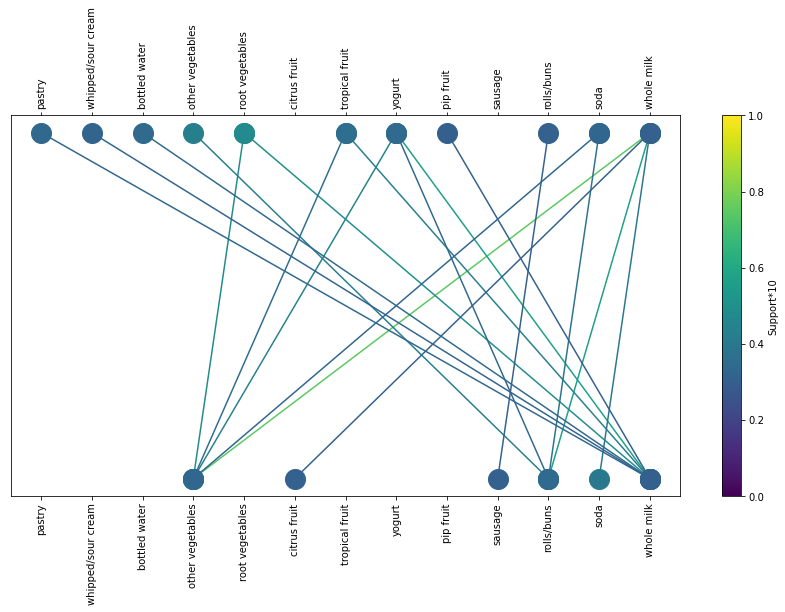

In [12]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

fig = plt.figure(figsize=(15,7))
for index, row in kurallar_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10), markersize=20)
    
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

plt.xticks(range(len(urunler)), urunler, rotation='vertical')
plt.yticks([])
plt.show()

## FP Growth Algoritması
### Frequent Pattern Growth Algoritması
Apriori algoritmasının geliştirilmiş halidir. FP ağacı oluşturulur.
https://www.softwaretestinghelp.com/fp-growth-algorithm-data-mining/

In [21]:
# # pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

In [13]:
# Verilerin okunması

alisverisler = []
with open('Groceries.csv') as f:
    for line in f:
        alisveris = [urun for urun in line.strip().split(',') if urun != 'NaN']
        alisverisler.append(alisveris)

In [18]:
alisverisler[:3]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

In [22]:
# FP Growth algoritması
# 1.adım: Verinin hazırlanması
te = TransactionEncoder()
te_ary = te.fit(alisverisler).transform(alisverisler)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [24]:
df.shape

(9835, 169)

In [26]:
kurallar_df.head()

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)


In [28]:
kurallar_df = kurallar_df[kurallar_df.itemsets.map(len) == 2]

In [29]:
kurallar_df['From'] = kurallar_df['itemsets'].map(lambda x:list(x)[0])
kurallar_df['To'] = kurallar_df['itemsets'].map(lambda x:list(x)[1])
kurallar_df['N'] = (kurallar_df['support'] * len(alisverisler)).astype(int)
kurallar_df.sort_values('N', ascending=False, inplace=True)
kurallar_df.head()

,support,itemsets,From,To,N
132,0.074835,"(other vegetables, whole milk)",other vegetables,whole milk,736
142,0.056634,"(rolls/buns, whole milk)",rolls/buns,whole milk,557
104,0.056024,"(yogurt, whole milk)",yogurt,whole milk,551
219,0.048907,"(root vegetables, whole milk)",root vegetables,whole milk,481
217,0.047382,"(other vegetables, root vegetables)",other vegetables,root vegetables,466


In [30]:
# 3. adım: N değerine bağlı kuralları listele
# En üstteki 50 kural
kurallar_df = kurallar_df.sort_values('N', ascending=False).head(50)
# ürünleri listele
urunler = set(kurallar_df['From']) | set(kurallar_df['To'])
# ürünlerden sayılara mapping
imap = {urun: i for i, urun in enumerate(urunler)}
kurallar_df['FromN'] = kurallar_df['From'].map(imap)
kurallar_df['ToN'] = kurallar_df['To'].map(imap)
#
kurallar_df.head(20)

,support,itemsets,From,To,N,FromN,ToN
132,0.074835,"(other vegetables, whole milk)",other vegetables,whole milk,736,5,22
142,0.056634,"(rolls/buns, whole milk)",rolls/buns,whole milk,557,17,22
104,0.056024,"(yogurt, whole milk)",yogurt,whole milk,551,13,22
219,0.048907,"(root vegetables, whole milk)",root vegetables,whole milk,481,6,22
217,0.047382,"(other vegetables, root vegetables)",other vegetables,root vegetables,466,5,6
107,0.043416,"(yogurt, other vegetables)",yogurt,other vegetables,427,13,5
141,0.042603,"(other vegetables, rolls/buns)",other vegetables,rolls/buns,419,5,17
111,0.042298,"(tropical fruit, whole milk)",tropical fruit,whole milk,416,8,22
173,0.040061,"(soda, whole milk)",soda,whole milk,394,20,22
172,0.038332,"(soda, rolls/buns)",soda,rolls/buns,377,20,17


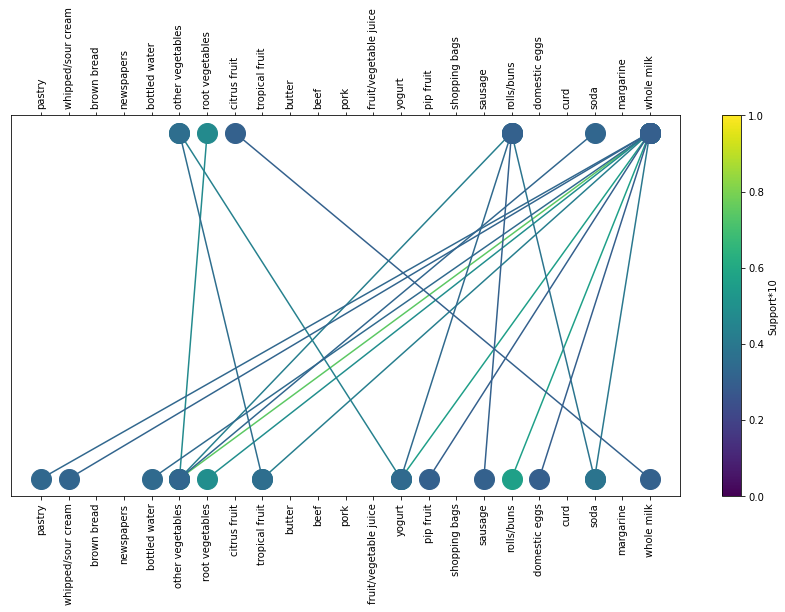

In [32]:
# Grafik gösterim
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

fig = plt.figure(figsize=(15,7))
for index, row in kurallar_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['support'] * 10), markersize=20)
    
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

plt.xticks(range(len(urunler)), urunler, rotation='vertical')
plt.yticks([])
plt.show()